# US Craft Beers

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.

In this assignment we have access to a SQL database containing information about craft beers in the USA. You can read about how the data was sourced [here](https://www.jeannicholashould.com/python-web-scraping-tutorial-for-craft-beers.html).

# How to complete and submit
Each exercise will look something like this:

```python
example_query = ''
#example_result = pd.read_sql(example_query, conn)
```

In each exercise you will need to define a query variable by writing  SQL code that you think will solve the problem. Once you have your query, uncomment the second line, this will execute your query and load the resulting data into a pandas DataFrame.

Nothing else needs to be changed in the second line besides uncommenting it, you should not change the name of the query.

After running this you will be free to inspect the result produced to see whether it's what you expect as the result. **KATE** will look for variables with the names defined in this notebook, so it is important not to rename the variables defined in this notebook.

Once you've completed the exercises submit this notebook to **KATE** to get feedback. You can also submit the notebook when you only have parts of it completed - if you do so, make sure you do not uncomment the `pd.read_sql` lines for which you don't have a query yet.

Refer to the instructions on **KATE** for more details on the dataset.

# Setup

The below code is setting up a connection to the SQLite database. 

**Do not change this code!** The `conn` variable will be used throughout the notebook to query the database.

In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("data/beers.db")

# Queries

**Q1. Let's start by inspecting the database's metadata. To do this, load all the schemas from the `sqlite_master` table. The columns we want are `type`, `name`, `tbl_name`, `rootpage`, and `sql`.**


In [2]:
# Add your code below
metadata_query = '''
SELECT
    *
FROM
    sqlite_master
'''

metadata_result = pd.read_sql_query(metadata_query, conn)
metadata_result

,type,name,tbl_name,rootpage,sql
0,table,beers,beers,2,"CREATE TABLE ""beers"" (\n""abv"" REAL,\n ""ibu"" R..."
1,table,breweries,breweries,40,"CREATE TABLE ""breweries"" (\n""brewery_id"" INTEG..."


**Q2. Now that we know something about the structure of the `beers` table, let's retrieve some information. To get started, retrieve the first 5 rows of the `beers` table. We want the `abv`, `ibu`, `name`, and `style` columns.**

In [3]:
# Add your code below
five_rows_beers_query = '''
SELECT
    abv,
    ibu,
    name,
    style
FROM
    beers
LIMIT
    5
'''

five_rows_beers_result = pd.read_sql_query(five_rows_beers_query, conn)
five_rows_beers_result

,abv,ibu,name,style
0,0.050,None,Pub Beer,American Pale Lager
1,0.066,None,Devil's Cup,American Pale Ale (APA)
2,0.071,None,Rise of the Phoenix,American IPA
3,0.090,None,Sinister,American Double / Imperial IPA
4,0.075,None,Sex and Candy,American IPA


**Q3. Similarly, query the first 5 rows of the `breweries` table. We want the `brewery_id`, `name`, `city`, and `state` columns.**

In [4]:
# Add your code below
five_rows_breweries_query = '''
SELECT
    brewery_id,
    name,
    city,
    state
FROM
    breweries
LIMIT
    5
'''

five_rows_breweries_result = pd.read_sql_query(five_rows_breweries_query, conn)
five_rows_breweries_result

,brewery_id,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


**Q4. Query the `beers` table to find out the number of rows. Use an alias so the name of the column returned is `row_count`.**

In [5]:
# Add your code below
beers_total_rows_query = '''
SELECT
    COUNT(*) AS row_count
FROM
    beers
'''

beers_total_rows_result = pd.read_sql_query(beers_total_rows_query, conn)
beers_total_rows_result

,row_count
0,2410


**Q5. Query the `beers` table to find out how many distinct styles are present. Use an alias so the name of the column returned is `distinct_styles`.**

In [6]:
# Add your code below
distinct_styles_query = '''
SELECT
    COUNT(DISTINCT(style)) AS distinct_styles
FROM
    beers
'''

distinct_styles_result = pd.read_sql_query(distinct_styles_query, conn)
distinct_styles_result

,distinct_styles
0,99


**Q6. Let's now find out about alcoholic content. Query the `beers` table to find the minimum, average, and maximum alcohol content (`abv`). The column names should be `min`, `avg`, and `max`.**

In [7]:
# Add your code below
alcoholic_content_query = '''
SELECT
    MIN(abv) AS min,
    AVG(abv) AS avg,
    MAX(abv) AS max
FROM
    beers
'''

alcoholic_content_result = pd.read_sql_query(alcoholic_content_query, conn)
alcoholic_content_result

,min,avg,max
0,0.001,0.059773,0.128


**Q7. Query the `beers` table to get all the `abv` values.**


We can then use this data to plot the distribution of the `abv`.

In [8]:
# Add your code below
abv_distribution_query = '''
SELECT
    abv
FROM
    beers
'''

abv_distribution_result = pd.read_sql_query(abv_distribution_query, conn)
abv_distribution_result

,abv
0,0.050
1,0.066
2,0.071
3,0.090
4,0.075
...,...
2405,0.067
2406,0.052
2407,0.055
2408,0.055


Once you have retrieved the `abv_distribution_result`, uncomment and execute the cell below to generate a histogram:

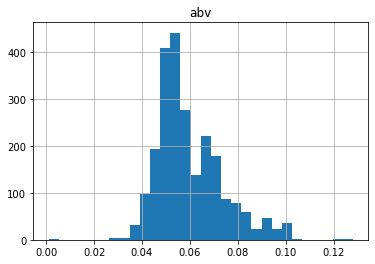

In [9]:
abv_hist = abv_distribution_result.hist(bins=30);

**Q8. Query the distinct types of IPA styles in the `beers` table.**


- Consider a style IPA if it has `"IPA"` in its name
- Name the column `ipa_styles`

In [10]:
# Add your code below
ipa_styles_query = '''
SELECT
    DISTINCT(style) AS ipa_styles
FROM
    beers
WHERE
    style LIKE '%IPA%'    
'''

ipa_styles_result = pd.read_sql_query(ipa_styles_query, conn)
ipa_styles_result

,ipa_styles
0,American IPA
1,American Double / Imperial IPA
2,Belgian IPA
3,English India Pale Ale (IPA)
4,American White IPA


**Q9. The `ibu` is an abbreviation for the International Bitterness Units scale; a measurement of a beer's bitterness. Calculate the average bitterness of lager beers and pale ale beers. Consider a beer style lager if its name contains `"lager"`, and consider a beer style pale ale if its name contains `"IPA"`, `"APA"` or `"Pale Ale"`.**

In [11]:
# Add your code below
lager_bitterness_query = '''
SELECT
    AVG(ibu)
FROM
    beers
WHERE
    style LIKE '%lager%'
'''

lager_bitterness_result = pd.read_sql_query(lager_bitterness_query, conn)
lager_bitterness_result

,AVG(ibu)
0,22.863636


In [12]:
# Add your code below
ale_bitterness_query = '''
SELECT
    AVG(ibu)
FROM
    beers
WHERE
    style LIKE '%IPA%' OR  
    style LIKE '%APA%' OR
    style LIKE '%Pale Ale%'
    
'''

ale_bitterness_result = pd.read_sql_query(ale_bitterness_query, conn)
ale_bitterness_result

,AVG(ibu)
0,63.353571


**Q10. Calculate how many beers there are of each `style` in the `beers` table.** 


- Your result should have two columns: `style` (the style name) and `number` (the number of beers of that style).

- Order the results by the `number` of beers of each style in _descending_ order. 

- Limit your result to the first `10` styles.

In [13]:
# Add your code below
style_count_query = '''
SELECT
    style,
    COUNT(*) AS number
FROM
    beers
GROUP BY
    style
ORDER BY
    number DESC
LIMIT
    10
'''

style_count_result = pd.read_sql_query(style_count_query, conn)
style_count_result

,style,number
0,American IPA,424
1,American Pale Ale (APA),245
2,American Amber / Red Ale,133
3,American Blonde Ale,108
4,American Double / Imperial IPA,105
5,American Pale Wheat Ale,97
6,American Brown Ale,70
7,American Porter,68
8,Saison / Farmhouse Ale,52
9,Witbier,51


**Q11. Query the `beers` and `breweries` tables to list all the breweries and beers that can be found in San Francisco.**


Your result should contain two columns: `brewery` and `beer`, and should be ordered alphabetically by brewery name then beer name.

_Note that you may want to use a `JOIN`_.

In [14]:
# Add your code below
beers_and_brewery_query = '''
SELECT
    breweries.name AS brewery,
    beers.name AS beer
FROM
    beers
LEFT JOIN 
    breweries ON beers.brewery_id = breweries.brewery_id
WHERE 
    city = 'San Francisco'
ORDER BY
    brewery,
    beer    
'''

beers_and_brewery_result = pd.read_sql_query(beers_and_brewery_query, conn)
beers_and_brewery_result

,brewery,beer
0,21st Amendment Brewery,21st Amendment IPA (2006)
1,21st Amendment Brewery,21st Amendment Watermelon Wheat Beer (2006)
2,21st Amendment Brewery,Back in Black
3,21st Amendment Brewery,Bitter American
4,21st Amendment Brewery,Bitter American (2011)
5,21st Amendment Brewery,Brew Free! or Die IPA
6,21st Amendment Brewery,Brew Free! or Die IPA (2008)
7,21st Amendment Brewery,Brew Free! or Die IPA (2009)
8,21st Amendment Brewery,Fireside Chat
9,21st Amendment Brewery,Fireside Chat (2010)


**Q12. Find the largest breweries by the number of beers produced.**


- Your result should have two columns, `name` and `number of beers`, and should be ordered from largest to smallest.

- If `number of beers` is the same, it should be ordered alphabetically.

- Limit your result to the top `10` breweries.

_Note: if a column name has spaces, you can wrap it in backticks(\` \`), quotes(" "), or square brackets(\[ \])._

_E.g. `SELECT [long column name] FROM table`_

In [15]:
# Add your code below
largest_breweries_query = '''
SELECT
    breweries.name AS name,
    COUNT(beers.name) AS [number of beers]
FROM
    beers
LEFT JOIN 
    breweries ON beers.brewery_id = breweries.brewery_id
GROUP BY
    breweries.brewery_id
ORDER BY
    [number of beers] DESC,
    name
LIMIT
    10
'''

largest_breweries_result = pd.read_sql_query(largest_breweries_query, conn)
largest_breweries_result

,name,number of beers
0,Brewery Vivant,62
1,Sun King Brewing Company,38
2,Oskar Blues Brewery,33
3,Cigar City Brewing Company,25
4,Sixpoint Craft Ales,24
5,Hopworks Urban Brewery,23
6,Stevens Point Brewery,22
7,21st Amendment Brewery,20
8,Great Crescent Brewery,20
9,Bonfire Brewing Company,19


**Q13. Query the `breweries` and `beers` tables to identify the top 10 US states with regard to the number of _breweries_.**


Your result should have three columns: `state`, `breweries` (the number of breweries), and `beers` (the number of `beers`).

In [16]:
# Add your code below
top_10_states_query = '''
SELECT
    breweries.state,
    COUNT(DISTINCT(breweries.brewery_id)) AS breweries,
    COUNT(beers.name) AS beers
FROM
    beers
LEFT JOIN 
    breweries ON beers.brewery_id = breweries.brewery_id
GROUP BY
    breweries.state
ORDER BY
    breweries DESC
LIMIT
    10
'''

top_10_states_result = pd.read_sql_query(top_10_states_query, conn)
top_10_states_result

,state,breweries,beers
0,CO,47,265
1,CA,39,183
2,MI,32,162
3,OR,29,125
4,TX,28,130
5,PA,25,100
6,WA,23,68
7,MA,23,82
8,IN,22,139
9,WI,20,87


## The Strong Beer Awards

### Let us create a competition for the strongest US craft beers. The rules are:

- A beer is considered strong if its ABV is above 0.06, and its IBU is above 60. 

- Between strong beers, the IBU value decides which is the strongest.

- Only strong beer specialist breweries are eligible. To be a specialist, the brewery must have at least three strong beers in its catalog.

- Each brewery presents only one beer for the competition (the one with the largest IBU).

- Ciders are not considered beer, nor are beers with unknown styles.

Let's go step-by-step to the result.

**Q14. Calculate the number of strong beers for each brewery.**


Present the results with two columns, the brewery `name` and the `number of strong beers`.

In [16]:
# Add your code below
number_of_strong_beers_query = '''
SELECT
    breweries.name,
    COUNT(beers.name) AS [number of strong beers]
FROM
    beers
LEFT JOIN
    breweries ON beers.brewery_id = breweries.brewery_id
WHERE
    abv > 0.06 
    AND
    ibu > 60
GROUP BY
    breweries.brewery_id
'''

number_of_strong_beers_result = pd.read_sql_query(number_of_strong_beers_query, conn)
number_of_strong_beers_result

**Q15. Now create a query that lists the names of breweries which have at least 3 strong beers. Your result should have one column called `name`.**


_Hint: To filter on a field after using a `GROUP BY`, use `HAVING`._

In [17]:
# Add your code below
at_least_three_strong_beers_query = '''
SELECT
    breweries.name
FROM
    beers
LEFT JOIN 
    breweries ON beers.brewery_id = breweries.brewery_id
WHERE
    abv > 0.06 
    AND
    ibu > 60
GROUP BY
    breweries.brewery_id
HAVING
    COUNT(beers.name) >= 3
'''

at_least_three_strong_beers_result = pd.read_sql_query(at_least_three_strong_beers_query, conn)
at_least_three_strong_beers_result

## And now for the results of the 2020 Strong Beer Awards!

**Q16. Calculate the results of the competition.**


Present the results in order, starting for the winner, with columns: `brewery_name`, `beer_name`, `style`, `abv`, `ibu`, `state`, and `city`. 


If the `ibu` value of the strongest beer of different breweries is the same, sort them alphabetically. 


Remember that each brewery only presents one beer.


If a brewery has more than one beer with the the maximum `ibu`, it can present any of them to the competition.

_Hint: First calculate the winner with all breweries included, then add a `WHERE` clause to filter down the breweries using **Q15** as a subquery. Recall that you can do `...WHERE x IN (SELECT...)...`_

In [28]:
max_abv = f'''
SELECT
    MAX(abv)
FROM
    beers
LEFT JOIN 
    breweries ON beers.brewery_id = breweries.brewery_id
WHERE
    breweries.name IN ({at_least_three_strong_beers_query})
GROUP BY
    breweries.brewery_id
'''


max_abv_result = pd.read_sql_query(max_abv, conn)
max_abv_result

In [29]:
max_ibu = f'''
SELECT
    MAX(ibu)
FROM
    beers
LEFT JOIN 
    breweries ON beers.brewery_id = breweries.brewery_id
WHERE
    breweries.name IN ({at_least_three_strong_beers_query})
GROUP BY
    breweries.brewery_id
'''


max_ibu_result = pd.read_sql_query(max_ibu, conn)
max_ibu_result

In [50]:
# Add your code below
strong_beer_awards_query = F'''
SELECT
    breweries.name AS brewery_name,
    beers.name AS beer_name,
    style,
    abv,
    ibu,
    state,
    city
FROM
    beers
LEFT JOIN 
    breweries ON beers.brewery_id = breweries.brewery_id
WHERE
    breweries.name IN ({at_least_three_strong_beers_query})
    AND
    beers.abv IN ({max_abv})
    AND
    beers.ibu IN ({max_ibu})
GROUP BY
    brewery_name
'''

strong_beer_awards_result = pd.read_sql_query(strong_beer_awards_query, conn)
strong_beer_awards_result

## Record the awards in a new table

Let's create a record of our competition results. However, before we do this we need to make sure that our database does not contain a table with the name `strong_beer_competition`.

To do this, we can create a cursor object to send commands directly to the database. We can use the `.execute()` method followed by the `.commit()` method to execute and save changes.

However first we create a temporary copy of the database to ensure we don't accidentally overwrite or damage our database, **if you make a mistake in Q17, 18 or 19 please just run the cell below again to update your database copy.**

Please **do not** edit the code in the following two cells.

In [ ]:
!cp -u data/beers.db beers_copy.db
conn = sqlite3.connect("beers_copy.db")

In [ ]:
cur = conn.cursor()

query = "DROP TABLE IF EXISTS strong_beer_competition"

cur.execute(query)
conn.commit()

**Q17. Now that we have ensured that any `strong_beer_competition` table has been deleted, let's create a new table in the database named `strong_beer_competiton`.**


We should include the following columns: `year` (`INTEGER`), `ranking` (`INTEGER`), `beer` (`STRING`), and `brewery` (`STRING`). We should also include a `CHECK` that the ranking is a positive number.


Note that your query should only create this table if it does not already exist.

In [ ]:
# Add your code below
# create_table_query = ...


**Q18. Using the `INSERT` function, iterate through the first 10 rows your `strong_beer_awards_result` DataFrame and insert them into the `strong_beer_competition` table. Set the year to 2020.**

In [ ]:
# Add your code below
# query = ...


**Q19. Finally, retrieve the results from the `strong_beer_competition` table. Select all the rows and save them to a DataFrame called `results_df`. Be sure to specify the columns by name.**

In [ ]:
# Add your code below
# results_query = ...
# results_df = pd.read_sql_query(results_query, conn)
# ...
